In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0. 차원 축소

- 많은 피처로 구성된 다차원의 데이터셋의 차원을 축소하여 새로운 차원의 데이터 셋을 생성
- 피쳐가 많을 경우 개별 피쳐간 상관 관계가 높은 피쳐들이 있음. 이 피쳐들은 다중 공선성 문제 때문에 제거
- 기존의 피처를 저차원의 중요 피처로 압축하여 추출 (PCA, LDA, SVD, NMF와 같은 차원 축소 알고리즘은 여기에 속함)

# 1. 차원 축소를 적용 Case

- 전처리 / 피쳐 엔지니어링 : 고성능 솔루션을 설계하기 위해서는 알고리즘 개발 중 제공되는 정보의 품질 및 입력 데이터와 원하는 결과 사이의 상관관계가 중요한데, 차원축소는 가장 중요한 정보 구성 요소를 데이터에서 분리하고 이를 모델에 제공해 가장 관련성이 높은 정보만 제공함. 또한 모델에서 제공하는 피쳐 수를 줄여 계산하므로 전체적인 시스템 훈련 시간을 줄여줌.
- 노이즈 감소 : 차원 축소는 효과적인 노이즈 감소 / 필터링 기법으로 사용할 수 있다.
- 신뢰 가능한 인공 데이터셋 생성 : 데이터셋을 정보의 구성 요소로 나눔에 따라 각 구성 요소의 영향을 조사하거나 고윳값 사이의 비율을 조정해 새로운 데이터 셋 샘플을 만들 수 있음.
- 재무 모델링 / 위험 분석 : 다수의 개별 시장 지표 또는 신호를 더 적은 수의 구성 요소로 통합, 금융 산업에 유용한 더 빠르고 효율적인 도구 제공

# 2. 차원의 저주

![차원의저주](http://dn.joongdo.co.kr/mnt/images/file/2018y/08m/08d/2018080801000664000027991.jpg)

- 특징 공간에 많은 수의 차원을 가진 데이터를 갖고 작업 할 때 발생
- 이용 가능한 피쳐의 수를 증가시킬수록 데이터의 밀도는 낮아지고 나아가 통계적으로 유효한 상관관계를 만들기가 더 어려움
- 데이터셋의 밀도 문제를 해결하지 않고서는 머신러닝 모델의 성능을 개선하지 못할 수 있음
- 추가적인 특징들이 제공하는 유용한 정보는 유지하면서도 밀도에 따른 부정적인 영향을 최소화 하기 위해 차원 축소 기법을 사용
- 차원 축소는 더 높은 차원 공간 데이터를 더 낮은 차원의 공간으로 조정하는 형상 투영 프로세스를 사용하며 투영과 매니폴드 학습 기법이 있음

![차원의 저주 학습](https://i1.wp.com/thesciencelife.com/wp-content/uploads/2017/10/ff3.png?resize=768%2C549)
출처 http://thesciencelife.com/archives/1001

# 3. 투영

- 투영이란 사영이라고도 하며, 형을 평면(또는 공간)에 옮기는 것
- 쉽게 이해하려면 어떤 도형 위에 수직으로 빛이 들어와 어떤 평면이나 공간에 생기는 그림자를 생각

<center><img src="https://www.scienceall.com/nas/image/201302/CI125_57.jpg" width="300" height="300"></center>

### PCA

- 데이터의 속성 하나하나는 좌표축으로 이루어진 다차원 공간에 위치하고 있음
- 속성들 간에 서로 연관되어 있는데 이를 수치화한 것을 상관계수라고 함
- 이를 확장해서 모든 속성을 고려했을때, 가장 전체 데이터를 잘 표현할 수 있는 벡터를 찾을 수 있음
- 이렇게 모든 속성에서 가장 중요한 방향(주성분)을 찾아 나가는 것을 PCA라고 함 = 전체 데이터에서 가장 분산이 큰 방향을 찾는 것.
- 두번째 주성분은 첫번째 주성분을 찾으면 그것과 직각이 되는 방향 중에서 가장 분산이 큰 성분을 찾음.
- 이런 방법으로 원본의 속성 만큼의 주성분을 차례대로 찾아나갈 수 있음

(0.6922751443224965,
 7.207724855677505,
 -0.03959290692065934,
 2.639592906920659)

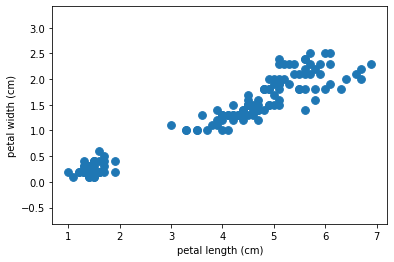

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

col1 = 2 # petal length
col2 = 3 # petal width

plt.scatter(iris.data[:,col1], iris.data[:,col2], s=60)
plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.axis('equal')

#### pca로 주성분 찾기

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris.data[:,[col1,col2]])

pca.components_

array([[ 0.92177769,  0.38771882],
       [-0.38771882,  0.92177769]])

각 행은 (0.9, 0.4)와 (-0.4, 0.9)는 주성분을 나타내며 (0.9, 0.4)의 성분은 각각 x축, y축 방향을 나타냄

In [4]:
# 벡터곱이 0, 즉 두 성분은 직교한다
c = pca.components_
(c[0]*c[1]).sum()

0.0

#### 주성분을 그래프에 표현해보자

(-1.159787929903594,
 7.295918335402557,
 -0.1258905866782118,
 2.6437023202424474)

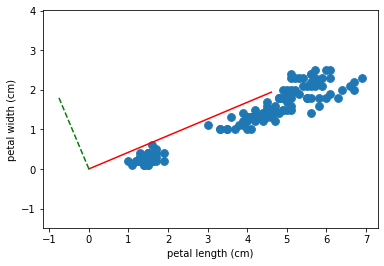

In [5]:
plt.scatter(iris.data[:,col1], iris.data[:,col2], s=60)

scale=5
plt.plot([0,pca.components_[0,0]*scale], [0,pca.components_[0,1]*scale],'r-')

scale=2
plt.plot([0,pca.components_[1,0]*scale], [0,pca.components_[1,1]*scale],'g--')

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.axis('equal')

PCA 결과를 다른 식으로 해석하면, 데이터를 가장 잘 표현하는 새로운 축들로 데이터를 회전변환 하는 것

In [6]:
# pca 변환
X_pca = pca.transform(iris.data[:,[col1,col2]])
X_pca.shape

(150, 2)

In [8]:
print('첫 행 pca 변환전 : ', iris.data[0,[col1,col2]])
print('첫 행 pca 변환후 : ', X_pca[0])

첫 행 pca 변환전 :  [1.4 0.2]
첫 행 pca 변환후 :  [-2.56101214 -0.00692219]


(-4.545448028673835,
 7.454408602150538,
 -1.1756898454746136,
 2.6894867549668873)

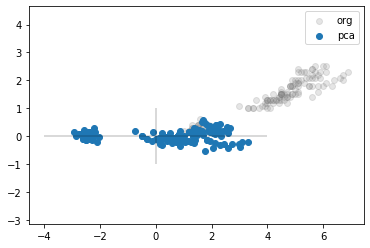

In [9]:
plt.scatter(iris.data[:,col1], iris.data[:,col2], c='gray', alpha=0.2, label='org')

plt.hlines([0],-4,4, alpha=0.2)
plt.vlines([0],-1,1, alpha=0.2)
plt.scatter(X_pca[:,0], X_pca[:,1], label='pca')

plt.legend()
plt.axis('equal')

#### 정규화 후 PCA 적용

- 스케일이 다르면 분산도 달라지므로 pca 도 svm처럼 정규화가 반드시 필요
- 스케일이 큰 쪽으로 그림이 늘어나기 때문에 스케일이 큰 속성이 주성분이 될 확률이 높음

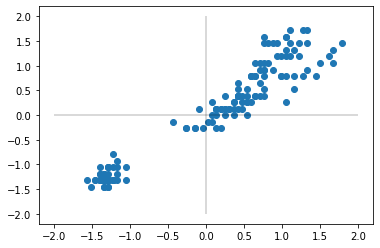

In [10]:
X_norm = iris.data[:,[col1,col2]]
X_norm = (X_norm - X_norm.mean(axis=0)) / X_norm.std(axis=0)

plt.hlines([0], -2, 2, alpha=0.2)
plt.vlines([0], -2, 2, alpha=0.2)
plt.scatter(X_norm[:,0], X_norm[:,1])

In [11]:
pca2 = PCA()
pca2.fit(X_norm)
X_norm_pca = pca2.transform(X_norm)

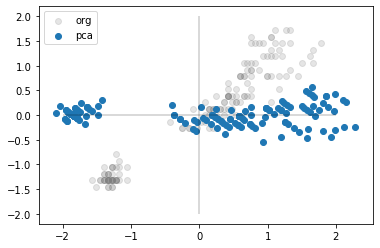

In [12]:
plt.scatter(X_norm[:,0], X_norm[:,1], c='gray', alpha=0.2, label='org')

plt.hlines([0],-2,2, alpha=0.2)
plt.vlines([0],-2,2, alpha=0.2)
plt.scatter(X_norm_pca[:,0], X_norm_pca[:,1], label='pca')

plt.legend()

#### 다차원 공간의 PCA (Iris 속성 4개 모두 사용)

In [44]:
pca = PCA()
pca.fit(iris.data)

pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

- X_pca는 원본 속성을 PCA로 변환한 4개의 새로운 속성값을 가짐
- PCA는 원본 속성의 속성 갯수를 줄이는 용도로 많이 사용
- 앞에 있는 주성분이 중요하므로 앞 쪽에 있는 주성분 2개만 적용

In [46]:
pca.explained_variance_ratio_[:2].sum()

0.977685206318795

In [37]:
pca = PCA(2) # n_components=2
pca.fit(iris.data)

pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

- 첫번째 주성분은 3번째 속성의 값이 크다. 즉, petal length 속성이 중요하게 고려
- 두번째 주성분은 1번째와 2번째 속성의 값이 크다. sepal length와 sepal width의 역할이 큼

In [40]:
X_pca = pca.transform(iris.data)
display(X_pca.shape, X_pca[:5])

(150, 2)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

- 원본 속성이 4개인데 주성분을 2개로 해서 변환한다는 것은 4차원 데이터를 2차원으로 축소하는 효과를 보여준다.
- 속성이 2개로 줄었으므로 2차원 그래프를 그릴 수 있음

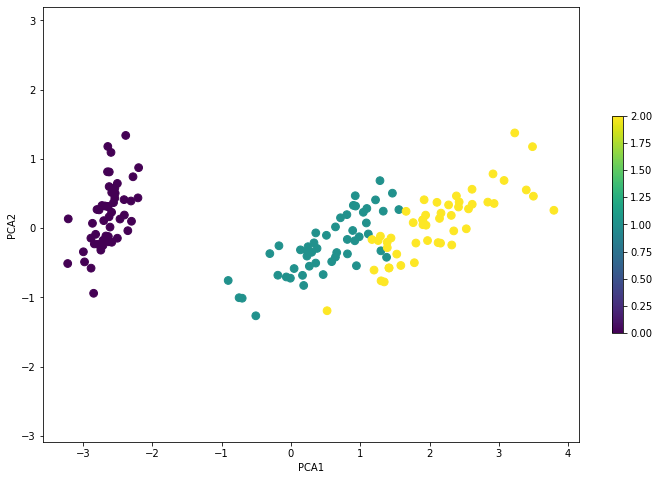

In [17]:
plt.figure(figsize=[12,8])
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris.target, s=60)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.axis('equal')
plt.colorbar(shrink=0.5)

원본 속성과 비교를 위해 scatter matrix를 그려보면 petal length와 sepal lengh의 산점도와 유사

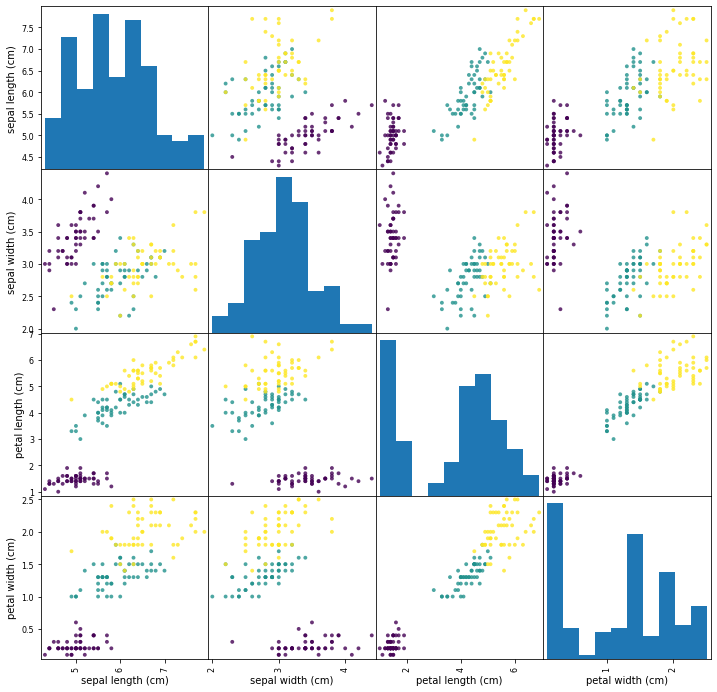

In [19]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, s=60, alpha=0.8, figsize=[12,12])
print('')

#### 변환 후 분류

- PCA로 변환한 데이터에 분류 알고리즘을 적용
- PCA도 정규화와 마찬가지로 속성을 변환하는 것이므로, 훈련세트에 대해 변환기준을 세워야 함 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = SVC()
model.fit(X_train_pca, y_train)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

train_score, test_score

C:\Users\whanh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.9464285714285714, 0.9736842105263158)